# CNS spring-block simulations

In this tutorial, we'll run a series of spring-block (1D fault) simulations with the _Chen-Niemeijer-Spiers_ (CNS) microphysical model. We start by importing the necessary libraries:

In [1]:
# Make plots interactive in the notebook
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

import os
import sys

# Add QDYN source directory to PATH
# Go up in the directory tree
upup = [os.pardir]*2
qdyn_dir = os.path.join(*upup)
# Get QDYN src directory
src_dir = os.path.abspath(
    os.path.join(
        os.path.join(os.path.abspath(""), qdyn_dir), "src")
)
# Append src directory to Python path
sys.path.append(src_dir)

# Import QDYN wrapper
from pyqdyn import qdyn

The simulation parameters are accessible after instantiation of the QDYN class as a Python dictionary object. We first define a number of global simulation parameters:

In [2]:
# Instantiate the QDYN class object
p = qdyn()

# Get the settings dict
set_dict = p.set_dict

# Global simulation parameters
set_dict["MESHDIM"] = 0        # Simulation dimensionality (spring-block)
set_dict["TMAX"] = 200         # Maximum simulation time [s]
set_dict["NTOUT"] = 100        # Save output every N steps
set_dict["V_PL"] = 1e-5        # Load-point velocity [m/s]
set_dict["MU"] = 2e9           # Shear modulus [Pa]
set_dict["VS"] = 0             # Turn of radiation damping
set_dict["SIGMA"] = 5e6        # Effective normal stress [Pa]
set_dict["ACC"] = 1e-7         # Solver accuracy
set_dict["SOLVER"] = 2         # Solver type (Runge-Kutta)

# To switch from rate-and-state friction ("RSF"; default) to the CNS model,
# we set the "FRICTION_MODEL" to "CNS"
set_dict["FRICTION_MODEL"] = "CNS"

We then overwrite the default values of specific rheological parameters:

In [3]:
set_dict["SET_DICT_CNS"]["H"] = 0.5        # Dilatancy coefficient (higher = more dilatancy)
set_dict["SET_DICT_CNS"]["PHI_C"] = 0.3    # Critical state (maximum) porosity
set_dict["SET_DICT_CNS"]["A"] = [1e-10]    # Kinetic parameter of the creep mechanism
set_dict["SET_DICT_CNS"]["N"] = [1]        # Stress exponent of the creep mechanism

# Thickness of the (localised) gouge layer [m]
set_dict["SET_DICT_CNS"]["THICKNESS"] = 1e-4
# Initial shear stress [Pa]
set_dict["SET_DICT_CNS"]["TAU"] = 0.5 * set_dict["SIGMA"]
# Initial porosity [-]
set_dict["SET_DICT_CNS"]["PHI_INI"] = 0.25

Lastly, we pass the settings to the QDYN wrapper, generate the mesh (only 1 element) and write the `qdyn.in` input file:

In [4]:
p.settings(set_dict)
p.render_mesh()
p.write_input()

True

The `p.write()` command writes a `qdyn.in` file to the current working directory, which is read by QDYN at the start of the simulation. To do this, call `p.run()`. Note that in this notebook, the screen output (`stdout`) is captured by the console, so you won't see any output here.

In [5]:
p.run()

0

The simulation output is read and processed by the wrapper using:

In [6]:
p.read_output()

True

The simulation time series output is then stored as a pandas `DataFrame` in `p.ot`. To inspect the first 10 entries:

In [7]:
p.ot[0].head(10)

,t,loc_size,crack_size,potcy,pot_rate,v,theta,v_theta_dc,tau,slip,x_max,v_max,theta_max,omeg_max,tau_max,slip_max,sigma_max
0,0.484789,0.0,0.0,3.927920e-07,7.962330e-07,7.962330e-07,0.246743,1.964650e-07,2508880.0,3.927920e-07,0.0,7.962330e-07,0.246743,1.964650e-07,2508880.0,3.927920e-07,5000000.0
1,1.351240,0.0,0.0,9.761310e-07,6.732510e-07,6.732510e-07,0.241899,1.628580e-07,2524940.0,9.761310e-07,0.0,6.732510e-07,0.241899,1.628580e-07,2524940.0,9.761310e-07,5000000.0
2,2.386123,0.0,0.0,1.576660e-06,5.802840e-07,5.802840e-07,0.237178,1.376300e-07,2544350.0,1.576660e-06,0.0,5.802840e-07,0.237178,1.376300e-07,2544350.0,1.576660e-06,5000000.0
3,3.745977,0.0,0.0,2.258660e-06,5.015290e-07,5.015290e-07,0.232084,1.163970e-07,2570080.0,2.258660e-06,0.0,5.015290e-07,0.232084,1.163970e-07,2570080.0,2.258660e-06,5000000.0
4,5.494778,0.0,0.0,3.021730e-06,4.363360e-07,4.363360e-07,0.226716,9.892430e-08,2603430.0,3.021730e-06,0.0,4.363360e-07,0.226716,9.892430e-08,2603430.0,3.021730e-06,5000000.0
5,7.751964,0.0,0.0,3.884290e-06,3.821420e-07,3.821420e-07,0.221041,8.446920e-08,2646730.0,3.884290e-06,0.0,3.821420e-07,0.221041,8.446920e-08,2646730.0,3.884290e-06,5000000.0
6,10.663289,0.0,0.0,4.866130e-06,3.372480e-07,3.372480e-07,0.215056,7.252730e-08,2702870.0,4.866130e-06,0.0,3.372480e-07,0.215056,7.252730e-08,2702870.0,4.866130e-06,5000000.0
7,14.422621,0.0,0.0,5.995130e-06,3.003190e-07,3.003190e-07,0.208750,6.269160e-08,2775670.0,5.995130e-06,0.0,3.003190e-07,0.208750,6.269160e-08,2775670.0,5.995130e-06,5000000.0
8,19.282071,0.0,0.0,7.312230e-06,2.710390e-07,2.710390e-07,0.202118,5.478190e-08,2870100.0,7.312230e-06,0.0,2.710390e-07,0.202118,5.478190e-08,2870100.0,7.312230e-06,5000000.0
9,25.601455,0.0,0.0,8.951030e-06,2.593290e-07,2.593290e-07,0.195151,5.060840e-08,2993180.0,8.951030e-06,0.0,2.593290e-07,0.195151,5.060840e-08,2993180.0,8.951030e-06,5000000.0


To see the behaviour of our spring-block fault, we can plot the time series of (normalised) shear stress, porosity, and slip velocity:

<IPython.core.display.Javascript object>


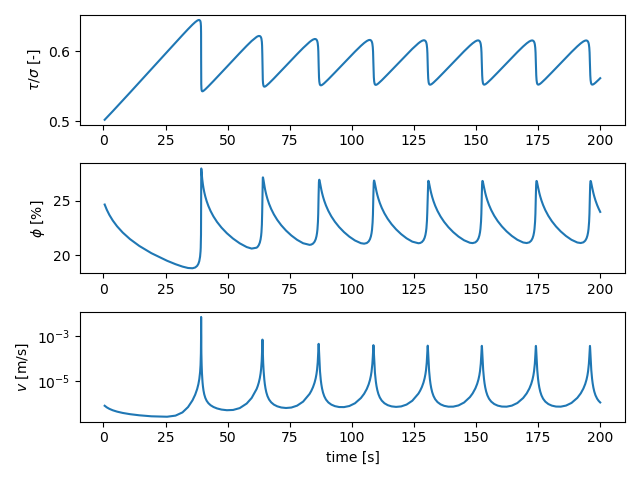

In [8]:
plt.figure()

# Normalised shear stress
plt.subplot(311)
plt.plot(p.ot[0]["t"], p.ot[0]["tau"] / set_dict["SIGMA"])
plt.ylabel(r"$\tau / \sigma$ [-]")

# Porosity
plt.subplot(312)
plt.plot(p.ot[0]["t"], 100 * p.ot[0]["theta"])
plt.ylabel(r"$\phi$ [%]")

# Velocity
plt.subplot(313)
plt.plot(p.ot[0]["t"], p.ot[0]["v"])
plt.yscale("log")
plt.ylabel(r"$v$ [m/s]")
plt.xlabel("time [s]")

plt.tight_layout()
plt.show()

Note that the stick-slip cycles converge to a stable limit cycle, even in the absence of radiation damping. This is in contrast to classical rate-and-state friction, which does not exhibit stable limit cycles.

The stability of a fault governed by CNS rheology is very sensitive to the granular flow parameters, such as the dilatancy parameter $H$ (see _van den Ende et al._ , [2018](https://doi.org/10.1016/j.tecto.2017.11.040)). By changing this value from 0.5 to 0.3, the fault stabilises at only deforms at steady-state:

<IPython.core.display.Javascript object>


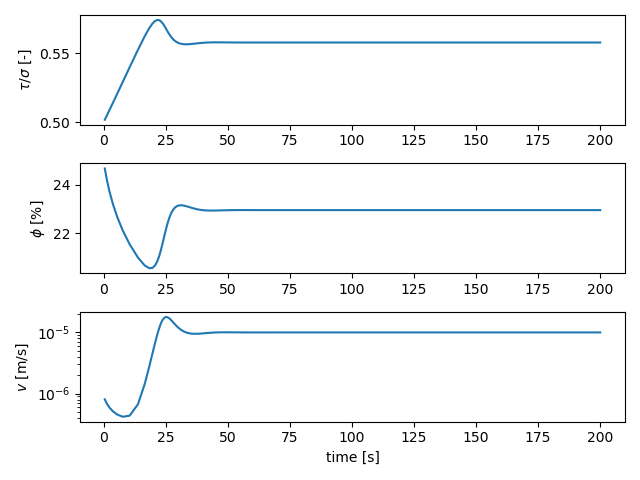

In [9]:
set_dict["SET_DICT_CNS"]["H"] = 0.3        # Updated dilatancy coefficient

# Write settings, run simulation
p.settings(set_dict)
p.render_mesh()
p.write_input()
p.run()
p.read_output()

# Plot time series
plt.figure()
plt.subplot(311)
plt.plot(p.ot[0]["t"], p.ot[0]["tau"] / set_dict["SIGMA"])
plt.ylabel(r"$\tau / \sigma$ [-]")

plt.subplot(312)
plt.plot(p.ot[0]["t"], 100 * p.ot[0]["theta"])
plt.ylabel(r"$\phi$ [%]")

plt.subplot(313)
plt.plot(p.ot[0]["t"], p.ot[0]["v"])
plt.yscale("log")
plt.ylabel(r"$v$ [m/s]")
plt.xlabel("time [s]")

plt.tight_layout()
plt.show()